In [1]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns

import scienceplots
#plt.style.use(['science', 'ieee', 'notebook'])

In [2]:
binary = os.path.join(os.getcwd(), 'data', 'volve_compiled.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    data = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/data/volve_compiled.pkl


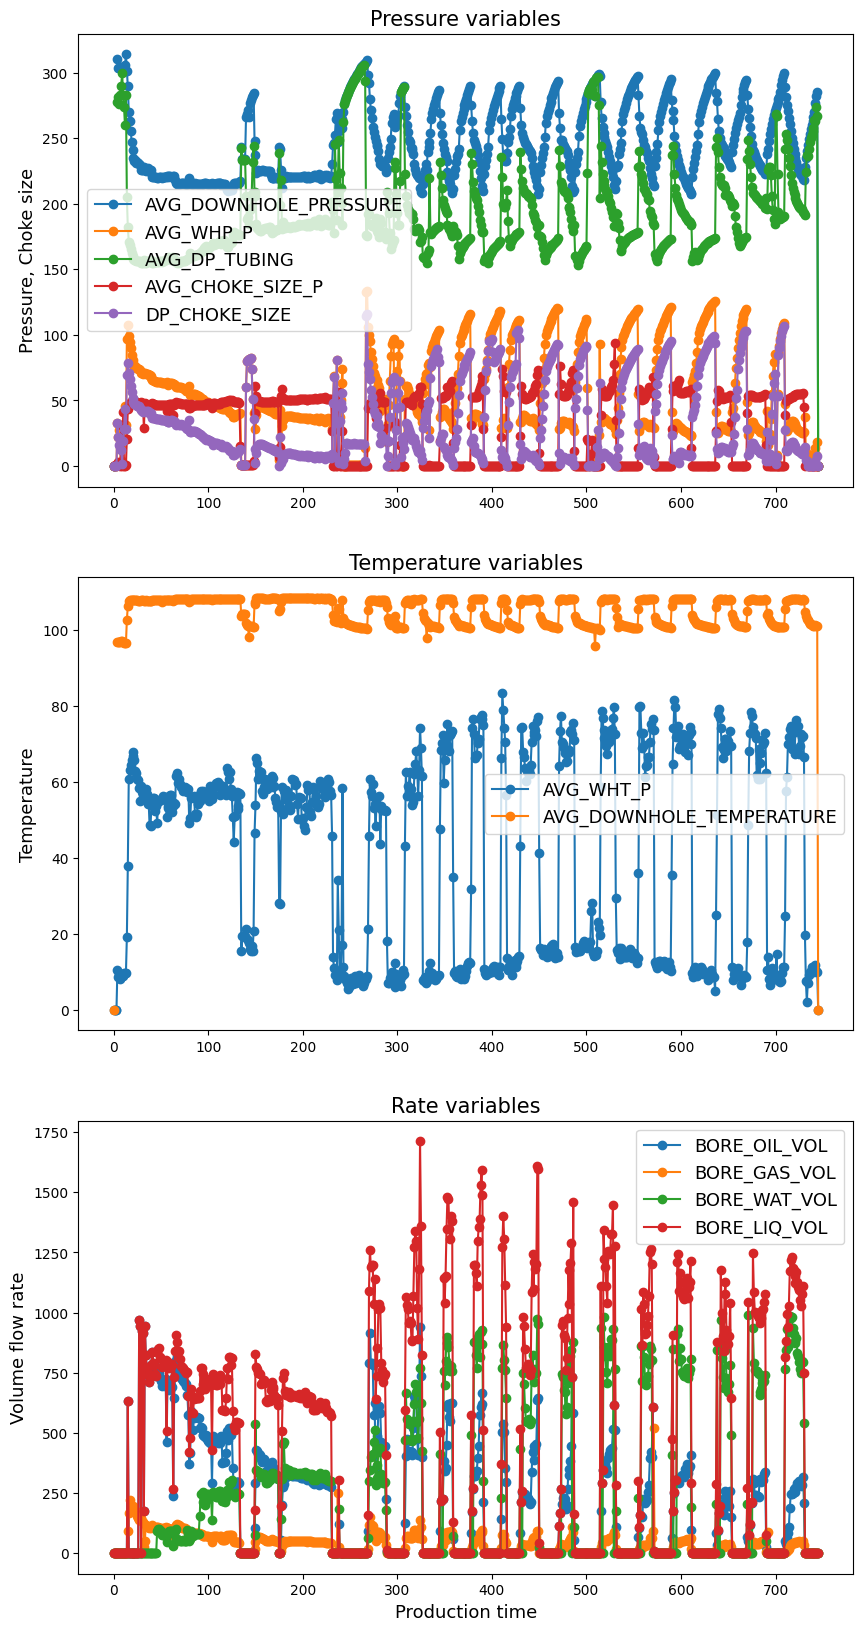

In [3]:
case = "15/9-F-1 C"
#case = "15/9-F-11"

data_case = data['OP'][case]

filt_vars_IN_Q =  [
        'BORE_OIL_VOL',
        'BORE_GAS_VOL',
        'BORE_WAT_VOL',
        #'BORE_OIL_CUM',
        #'BORE_LIQ_CUM',
        #'BORE_GAS_CUM',
        #'BORE_WAT_CUM',
]

filt_vars_IN_QINJ = [
        #'BORE_WI_VOL',
        #'BORE_WI_CUM',
]

filt_vars_IN_P = [
        'AVG_DOWNHOLE_PRESSURE',
        'AVG_WHP_P',
        'AVG_DP_TUBING',
        #'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P',
        'DP_CHOKE_SIZE',
]

filt_vars_IN_T = [
        'AVG_WHT_P',
        'AVG_DOWNHOLE_TEMPERATURE',
]

filt_vars_OUT = [
        'BORE_OIL_VOL',
        'BORE_GAS_VOL',
        'BORE_WAT_VOL',
        'BORE_LIQ_VOL',
]

time = data_case['N']
fig, ax = plt.subplots(3,1, figsize=(10, 20))
for var in filt_vars_IN_P:
    ax[0].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_IN_T:
    ax[1].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_OUT:
    ax[2].plot(time, data_case[var], '-o', label=var)
#for var in filt_vars_OUT:
#    ax[3].plot(time, data_case[var], '-o', label=var)
title_font = 15
label_font = 13
ax[0].set_title(f'Pressure variables', fontsize=title_font)
ax[1].set_title(f'Temperature variables', fontsize=title_font)
ax[2].set_title(f'Rate variables', fontsize=title_font)
ax[0].set_ylabel('Pressure, Choke size', fontsize=label_font)
ax[1].set_ylabel('Temperature', fontsize=label_font)
ax[2].set_ylabel('Volume flow rate', fontsize=label_font)
ax[2].set_xlabel('Production time', fontsize=label_font)
ax[0].legend(fontsize=label_font)
ax[1].legend(fontsize=label_font)
ax[2].legend(fontsize=label_font)

fig.savefig('data/data_example.pdf',  bbox_inches = "tight")

In [4]:
prefix = 'SISO.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/SISO.W1_ml.pkl


In [5]:
model_pars = []
best_pars = []
yhats = []
lags = []
for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)


LinReg
PolyReg
SVM
KNN
DecisionTree
RandomForest
GradientBoosting
ExtraTrees
MLP


In [6]:
prefix = 'SISO-Static.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/SISO-Static.W1_ml.pkl


In [7]:

for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)

LinReg
PolyReg
SVM
KNN
DecisionTree
RandomForest
GradientBoosting
ExtraTrees
MLP


In [8]:
prefix = 'SISO-Seasonal.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/SISO-Seasonal.W1_ml.pkl


In [9]:
for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te).sum(axis=1),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1).sum(axis=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), [model.cv_results_ for model in row['MODEL OBJ'].estimator.estimators_]))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), [model.best_params_ for model in row['MODEL OBJ'].estimator.estimators_]))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
        print(e)

SVM
'MultiOutputRegressor' object has no attribute 'cv_results_'
KNN
'MultiOutputRegressor' object has no attribute 'cv_results_'
DecisionTree
'MultiOutputRegressor' object has no attribute 'cv_results_'
RandomForest
'MultiOutputRegressor' object has no attribute 'cv_results_'
GradientBoosting
'MultiOutputRegressor' object has no attribute 'cv_results_'
ExtraTrees
'MultiOutputRegressor' object has no attribute 'cv_results_'
MLP


In [10]:
prefix = 'SISO-FFT.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/SISO-FFT.W1_ml.pkl


In [11]:
for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te).sum(axis=1),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1).sum(axis=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), [model.cv_results_ for model in row['MODEL OBJ'].estimator.estimators_]))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), [model.best_params_ for model in row['MODEL OBJ'].estimator.estimators_]))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
        print(e)

SVM
'MultiOutputRegressor' object has no attribute 'cv_results_'
KNN
'MultiOutputRegressor' object has no attribute 'cv_results_'
DecisionTree
'MultiOutputRegressor' object has no attribute 'cv_results_'
RandomForest
'MultiOutputRegressor' object has no attribute 'cv_results_'
GradientBoosting
'MultiOutputRegressor' object has no attribute 'cv_results_'
ExtraTrees
'MultiOutputRegressor' object has no attribute 'cv_results_'
MLP


In [12]:
prefix = 'MISO.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/MISO.W1_ml.pkl


In [13]:

for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)

LinReg
PolyReg
SVM
KNN
DecisionTree
RandomForest
GradientBoosting
ExtraTrees
MLP


In [14]:
prefix = 'MISO-Static.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/MISO-Static.W1_ml.pkl


In [15]:

for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)

LinReg
PolyReg
SVM
KNN
DecisionTree
RandomForest
GradientBoosting
ExtraTrees
MLP


In [16]:
prefix = 'MISO-Seasonal.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/MISO-Seasonal.W1_ml.pkl


In [17]:
for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te).sum(axis=1),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1).sum(axis=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), [model.cv_results_ for model in row['MODEL OBJ'].estimator.estimators_]))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), [model.best_params_ for model in row['MODEL OBJ'].estimator.estimators_]))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
        print(e)
y_tr, y_te = y_tr.sum(axis=1), y_te.sum(axis=1)

SVM
'MultiOutputRegressor' object has no attribute 'cv_results_'
KNN
'MultiOutputRegressor' object has no attribute 'cv_results_'
DecisionTree
'MultiOutputRegressor' object has no attribute 'cv_results_'
RandomForest
'MultiOutputRegressor' object has no attribute 'cv_results_'
GradientBoosting
'MultiOutputRegressor' object has no attribute 'cv_results_'
ExtraTrees
'MultiOutputRegressor' object has no attribute 'cv_results_'
MLP


In [18]:
prefix = 'MISO-FFT.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/MISO-FFT.W1_ml.pkl


In [19]:
for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te).sum(axis=1),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1).sum(axis=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), [model.cv_results_ for model in row['MODEL OBJ'].estimator.estimators_]))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), [model.best_params_ for model in row['MODEL OBJ'].estimator.estimators_]))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
        print(e)
y_tr, y_te = y_tr.sum(axis=1), y_te.sum(axis=1)

SVM
'MultiOutputRegressor' object has no attribute 'cv_results_'
KNN
'MultiOutputRegressor' object has no attribute 'cv_results_'
DecisionTree
'MultiOutputRegressor' object has no attribute 'cv_results_'
RandomForest
'MultiOutputRegressor' object has no attribute 'cv_results_'
GradientBoosting
'MultiOutputRegressor' object has no attribute 'cv_results_'
ExtraTrees
'MultiOutputRegressor' object has no attribute 'cv_results_'
MLP


In [20]:
cv_errors = {
    'MODEL' : [],
    'INPUTS': [],
    'SPLIT' : [],
    'R2 SCORE': [],
            }

mlp_data = {
    'INPUTS' : [],
    'R2 MEAN SCORE' : [],
    'R2 STD DEV' : []
    }

times = {
    'MODEL':[],
    'INPUTS': [],
    'TIME MEAN' :[],
    'TIME STD': []
}
for model, model_par in model_pars:

    times['MODEL'].append(model.split('.')[0])
    times['INPUTS'].append(model.split('.')[1])
    try:
        best_model = np.where(model_par['rank_test_score'] == 1)[0]
        times['TIME MEAN'].append(model_par['mean_fit_time'][best_model][0])
        times['TIME STD'].append(model_par['std_fit_time'][best_model][0])
    except Exception:
        best_model = [np.where(model_pari['rank_test_score'] == 1)[0] for model_pari in model_par]
        times['TIME MEAN'].append(np.max([model_pari['mean_fit_time'][best_modeli][0] for model_pari, best_modeli in zip(model_par, best_model)]))
        times['TIME STD'].append(None)
    

In [21]:
pd.DataFrame(times)

,MODEL,INPUTS,TIME MEAN,TIME STD
0,LinReg,SISO,0.001296,0.000439
1,PolyReg,SISO,0.001541,0.000342
2,SVM,SISO,0.004583,0.001077
3,KNN,SISO,0.000491,0.000275
4,DecisionTree,SISO,0.001372,0.000282
...,...,...,...,...
59,DecisionTree,MISO-FFT,0.021801,NaN
60,RandomForest,MISO-FFT,3.289486,NaN
61,GradientBoosting,MISO-FFT,1.743803,NaN
62,ExtraTrees,MISO-FFT,0.312519,NaN


In [22]:
errors = {
    'MODEL':[],
    'INPUTS':[],
    'R2 OSA TRAIN':[],
    'R2 OSA TEST':[],
    'R2 OSA TOTAL':[],
    'R2 FS TRAIN':[],
    'R2 FS TEST':[],
    'R2 FS TOTAL':[],
    'RMSE OSA TRAIN':[],
    'RMSE OSA TEST':[],
    'RMSE OSA TOTAL':[],
    'RMSE FS TRAIN':[],
    'RMSE FS TEST':[],
    'RMSE FS TOTAL':[],
    }

#fig, ax   = plt.subplots(1,1, figsize=(12,7))
for model, yhat, yhat_OSA in yhats:
    model_name = model.split('.')[0]
    model_input = model.split('.')[1]
    errors['MODEL'].append(model_name)
    errors['INPUTS'].append(model_input)
    #if not model_name in ['PolyReg', 'LinReg', 'MLP']: continue
    print(model)
    print(y_te.shape, yhat_OSA.shape, yhat.shape)
    print('R2 Train (OSA):', r2_score(y_te.ravel()[:502], yhat_OSA.ravel()[:502]))
    errors['R2 OSA TRAIN'].append(r2_score(y_te.ravel()[:502], yhat_OSA.ravel()[:502]))
    print('R2 Test (OSA):', r2_score(y_te.ravel()[502:], yhat_OSA.ravel()[502:]))
    errors['R2 OSA TEST'].append(r2_score(y_te.ravel()[502:], yhat_OSA.ravel()[502:]))
    print('R2 Full  (OSA):', r2_score(y_te.ravel(), yhat_OSA.ravel()))
    errors['R2 OSA TOTAL'].append(r2_score(y_te.ravel(), yhat_OSA.ravel()))
    print('R2 Train (FS): ', r2_score(y_te.ravel()[:502], yhat.ravel()[:502]))
    errors['R2 FS TRAIN'].append(r2_score(y_te.ravel()[:502], yhat.ravel()[:502]))
    print('R2 Test (FS): ', r2_score(y_te.ravel()[502:], yhat.ravel()[502:]))
    errors['R2 FS TEST'].append(r2_score(y_te.ravel()[502:], yhat.ravel()[502:]))
    print('R2 Full  (FS): ', r2_score(y_te.ravel(), yhat.ravel()))
    errors['R2 FS TOTAL'].append(r2_score(y_te.ravel()[:], yhat.ravel()[:]))
    print('RMSE Train (OSA):', mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    errors['RMSE OSA TRAIN'].append(mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    print('RMSE Test (OSA):', mean_squared_error(y_te.ravel()[502:], yhat_OSA.ravel()[502:])**0.5)
    errors['RMSE OSA TEST'].append(mean_squared_error(y_te.ravel()[502:], yhat_OSA.ravel()[502:])**0.5)
    print('RMSE Full  (OSA):', mean_squared_error(y_te.ravel(), yhat_OSA.ravel())**0.5)
    errors['RMSE OSA TOTAL'].append(mean_squared_error(y_te.ravel()[:], yhat_OSA.ravel()[:])**0.5)
    print('RMSE Train (FS): ', mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    errors['RMSE FS TRAIN'].append(mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    print('RMSE Test (FS): ', mean_squared_error(y_te.ravel()[502:], yhat.ravel()[502:])**0.5)
    errors['RMSE FS TEST'].append(mean_squared_error(y_te.ravel()[502:], yhat.ravel()[502:])**0.5)
    print('RMSE Full  (FS): ', mean_squared_error(y_te.ravel(), yhat.ravel())**0.5)
    errors['RMSE FS TOTAL'].append(mean_squared_error(y_te.ravel()[:], yhat.ravel()[:])**0.5)

LinReg.SISO.W1
(718,) (718, 1) (718, 1)
R2 Train (OSA): 0.7737664713838261
R2 Test (OSA): 0.7756246840150631
R2 Full  (OSA): 0.7763265124528665
R2 Train (FS):  0.3712758916790264
R2 Test (FS):  0.4283372663794477
R2 Full  (FS):  0.3960504082840639
RMSE Train (OSA): 0.1255180973221431
RMSE Test (OSA): 0.1377551893920894
RMSE Full  (OSA): 0.12932128524742822
RMSE Train (FS):  0.2092463636721591
RMSE Test (FS):  0.21988235021653052
RMSE Full  (FS):  0.21250203994029113
PolyReg.SISO.W1
(718,) (718, 1) (718, 1)
R2 Train (OSA): 0.7737664713838261
R2 Test (OSA): 0.7756246840150631
R2 Full  (OSA): 0.7763265124528665
R2 Train (FS):  0.3712758916790264
R2 Test (FS):  0.4283372663794477
R2 Full  (FS):  0.3960504082840639
RMSE Train (OSA): 0.1255180973221431
RMSE Test (OSA): 0.1377551893920894
RMSE Full  (OSA): 0.12932128524742822
RMSE Train (FS):  0.2092463636721591
RMSE Test (FS):  0.21988235021653052
RMSE Full  (FS):  0.21250203994029113
SVM.SISO.W1
(718,) (718, 1) (718, 1)
R2 Train (OSA): 0.81

In [23]:
results_df = pd.concat([pd.DataFrame(errors), pd.DataFrame(times).iloc[:,2:]],axis='columns')
results_df['BEST LAG'] = np.array([lag[-1] for lag in lags])
results_df = pd.concat([results_df, pd.read_csv('./data/best_resid_models.csv', index_col=0)])


In [24]:
results_df = results_df.reset_index(drop=True)

In [25]:
results_df = results_df.sort_values('R2 FS TOTAL', ascending=False).reset_index().sort_values('index').reset_index()
results_df['level_0'] += 1
rmse_ref = results_df[results_df['level_0'] == 1]['RMSE FS TOTAL'].values
results_df['RMSE INCREMENT'] = (results_df['RMSE FS TOTAL'] - rmse_ref)/results_df['RMSE FS TOTAL'] * 100
results_df = results_df[
    ['MODEL', 
    'INPUTS', 
    'BEST LAG', 
    #'R2 OSA TRAIN', 
    'R2 FS TRAIN', 
    #'RMSE OSA TRAIN', 
    'RMSE FS TRAIN', 
    #'R2 OSA TOTAL', 
    'R2 FS TOTAL', 
    #'RMSE OSA TOTAL', 
    'RMSE FS TOTAL', 
    'RMSE INCREMENT', 
    'TIME MEAN', 
    'level_0']].round(3)

In [26]:
rmse_ref

array([0.1256749])

In [27]:
display(results_df[results_df.MODEL == 'DecisionTree'])

,MODEL,INPUTS,BEST LAG,R2 FS TRAIN,RMSE FS TRAIN,R2 FS TOTAL,RMSE FS TOTAL,RMSE INCREMENT,TIME MEAN,level_0
4,DecisionTree,SISO,13,0.652,0.156,0.614,0.170,26.006,0.001,55
13,DecisionTree,SISO-Static,17,0.738,0.135,0.715,0.146,13.851,0.001,25
20,DecisionTree,SISO-Seasonal,12,0.148,0.244,0.160,0.251,49.847,0.014,72
27,DecisionTree,SISO-FFT,17,0.149,0.243,0.134,0.254,50.606,0.010,73
36,DecisionTree,MISO,20,0.638,0.159,0.639,0.164,23.472,0.001,49
45,DecisionTree,MISO-Static,8,0.761,0.129,0.745,0.138,9.059,0.001,15
52,DecisionTree,MISO-Seasonal,5,0.496,0.187,0.509,0.192,34.411,0.013,65
59,DecisionTree,MISO-FFT,10,0.295,0.222,0.266,0.234,46.344,0.022,71
70,DecisionTree,MISO+residuals,20,0.697,0.145,0.687,0.153,17.860,1.897,35


In [28]:
print(results_df.sort_values('level_0', ascending=True).to_latex(index=False,).replace('000', '').replace('-', '+').replace('residuals', 'Residuals'))

\begin{tabular}{llrrrrrrrr}
\toprule
MODEL & INPUTS & BEST LAG & R2 FS TRAIN & RMSE FS TRAIN & R2 FS TOTAL & RMSE FS TOTAL & RMSE INCREMENT & TIME MEAN & level_0 \\
\midrule
MLP & MISO+Static & 12 & 0.792 & 0.120 & 0.789 & 0.126 & 0. & 0.523 & 1 \\
RandomForest & MISO+Static & 20 & 0.789 & 0.121 & 0.784 & 0.127 & 1.108 & 0.804 & 2 \\
ExtraTrees & MISO+Static & 8 & 0.791 & 0.121 & 0.783 & 0.127 & 1.326 & 0.111 & 3 \\
GradientBoosting & MISO+Static & 17 & 0.787 & 0.122 & 0.779 & 0.129 & 2.256 & 1.485 & 4 \\
RandomForest & SISO+Static & 19 & 0.772 & 0.126 & 0.762 & 0.134 & 5.878 & 0.400 & 5 \\
KNN & MISO+FFT & 17 & 0.792 & 0.120 & 0.761 & 0.134 & 5.958 & 0.006 & 6 \\
GradientBoosting & MISO+Residuals & 19 & 0.767 & 0.127 & 0.759 & 0.134 & 6.213 & 2.521 & 7 \\
GradientBoosting & MISO & 19 & 0.764 & 0.128 & 0.757 & 0.135 & 6.846 & 1.577 & 8 \\
ExtraTrees & SISO+Static & 16 & 0.756 & 0.130 & 0.756 & 0.135 & 6.980 & 0.098 & 9 \\
PolyReg & MISO+Static & 10 & 0.757 & 0.130 & 0.755 & 0.135 & 7.0

In [29]:
results_df2 = results_df#[
    #(results_df.INPUTS !='SISO-Static')&
    #(results_df.INPUTS !='MISO-Static')&
    #(results_df.INPUTS !='MISO+residuals')
    #]
results_df2

,MODEL,INPUTS,BEST LAG,R2 FS TRAIN,RMSE FS TRAIN,R2 FS TOTAL,RMSE FS TOTAL,RMSE INCREMENT,TIME MEAN,level_0
0,LinReg,SISO,2,0.371,0.209,0.396,0.213,40.859,0.001,69
1,PolyReg,SISO,2,0.371,0.209,0.396,0.213,40.859,0.002,68
2,SVM,SISO,20,0.573,0.172,0.607,0.171,26.656,0.005,56
3,KNN,SISO,12,0.542,0.179,0.526,0.188,33.270,0.000,63
4,DecisionTree,SISO,13,0.652,0.156,0.614,0.170,26.006,0.001,55
...,...,...,...,...,...,...,...,...,...,...
68,PolyReg,MISO+residuals,5,0.735,0.136,0.719,0.145,13.328,0.743,24
69,SVM,MISO+residuals,12,0.717,0.140,0.701,0.149,15.654,0.800,31
70,DecisionTree,MISO+residuals,20,0.697,0.145,0.687,0.153,17.860,1.897,35
71,KNN,MISO+residuals,20,0.722,0.139,0.676,0.156,19.439,0.006,37


In [30]:
new_df = {
    'MODEL':[],
    'R2 FS TOTAL':[],
    'INPUT':[],
    'STRATEGY':[],
}
for i, row in results_df2.iterrows():
    #if row['MODEL'] in ['LinReg', 'PolyReg'] : continue
    case_split = row['INPUTS'].replace('+', '-').replace('residuals', 'Residuals').split('-')
    if len(case_split) == 1: case_split.append('None')
    inp, case = case_split
    new_df['MODEL'].append(row['MODEL'])
    new_df['R2 FS TOTAL'].append(row['R2 FS TOTAL'])
    new_df['INPUT'].append(inp)
    new_df['STRATEGY'].append(case)

new_df = pd.DataFrame(new_df)


/tmp/ipykernel_21167/1641531341.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


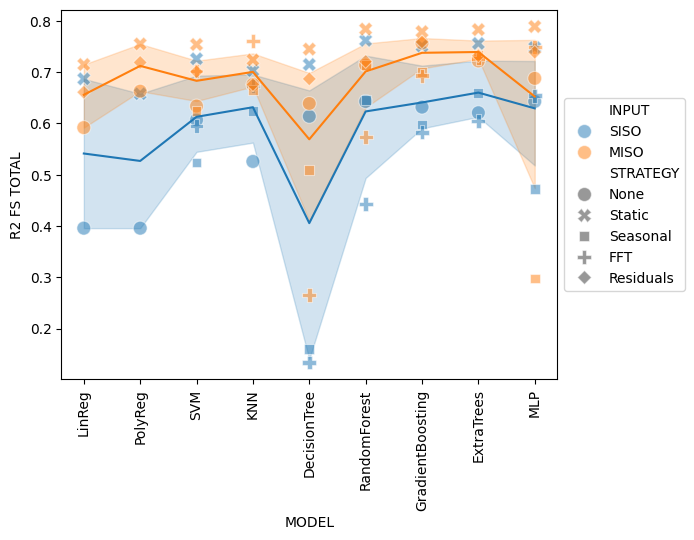

In [31]:
#plt.style.use(['science', 'ieee', 'notebook'])
fig, ax = plt.subplots()
sns.lineplot(new_df, x='MODEL', y='R2 FS TOTAL', ax=ax, hue='INPUT', legend=False)
sns.scatterplot(new_df, x='MODEL', y='R2 FS TOTAL', ax=ax, hue='INPUT', style='STRATEGY', s=100, alpha=0.5)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('./outputs/final_results/full_comparison.pdf', bbox_inches = "tight")

In [32]:
df_residuals = pd.read_csv('./data/best_resid_models_all.csv', index_col=0)
display(df_residuals)

,MODEL,RESIDUAL MODEL,INPUTS,BEST LAG,R2 OSA TRAIN,R2 FS TRAIN,RMSE OSA TRAIN,RMSE FS TRAIN,R2 OSA TOTAL,R2 FS TOTAL,RMSE OSA TOTAL,RMSE FS TOTAL,TIME MEAN
index,,,,,,,,,,,,,
514,GradientBoosting,KNN,MISO+residuals,19,0.975,0.767,0.041,0.127,0.914,0.759,0.080,0.134,2.521
515,GradientBoosting,DecisionTree,MISO+residuals,19,0.975,0.766,0.041,0.128,0.914,0.758,0.080,0.134,2.521
511,GradientBoosting,LinReg,MISO+residuals,19,0.976,0.769,0.041,0.127,0.914,0.758,0.080,0.134,2.526
516,GradientBoosting,RandomForest,MISO+residuals,19,0.976,0.766,0.041,0.128,0.915,0.758,0.080,0.134,2.588
519,GradientBoosting,MLP,MISO+residuals,19,0.975,0.764,0.042,0.128,0.914,0.757,0.080,0.135,2.362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,DecisionTree,PolyReg,MISO+residuals,20,NaN,NaN,0.092,NaN,NaN,NaN,0.147,NaN,3.574
592,RandomForest,PolyReg,MISO+residuals,20,NaN,NaN,0.052,NaN,NaN,NaN,0.176,NaN,5.341
602,GradientBoosting,PolyReg,MISO+residuals,20,NaN,NaN,0.051,NaN,NaN,NaN,0.289,NaN,8.425


In [42]:
models_list = np.unique(df_residuals.MODEL)
confmatrix = np.zeros((len(models_list),len(models_list)))

for i in range(len(models_list)):
    for j in range(len(models_list)):
        model_i = models_list[i]
        model_j = models_list[j]
        r2 = df_residuals[(df_residuals['MODEL'] == model_i)&(df_residuals['RESIDUAL MODEL'] == model_j)].sort_values('R2 FS TRAIN', ascending=False)['R2 FS TOTAL'].values[0]
        confmatrix[i,j] = r2

0.634


In [52]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

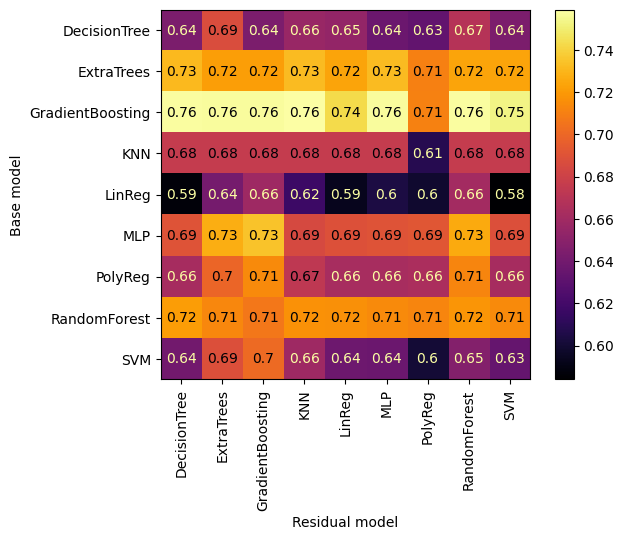

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

cmdisp = ConfusionMatrixDisplay(confmatrix, display_labels=models_list)
fig, ax = plt.subplots()
cmdisp.plot(ax=ax, cmap='inferno')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Residual model')
ax.set_ylabel('Base model')
fig.savefig('./outputs/final_results/residuals_matrix.pdf', bbox_inches = "tight")